##### Census Income Project - Vinayak Ratan

##### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
census_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\dataset1-master\census_income.csv')
census_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Basic Information of data

In [3]:
census_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
census_df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
census_df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26350,31,Private,127215,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
census_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

### Exploratory Data Analysis

In [7]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking for null values 
census_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There are no null values present in the data

In [9]:
# Separating the categorical and numerical datatypes for plotting purpose
cat_ci = census_df.select_dtypes(include=['object']).columns
num_ci = census_df.select_dtypes(include = ['int32','int64','float32','float64']).columns

In [10]:
cat_ci

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [11]:
num_ci

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

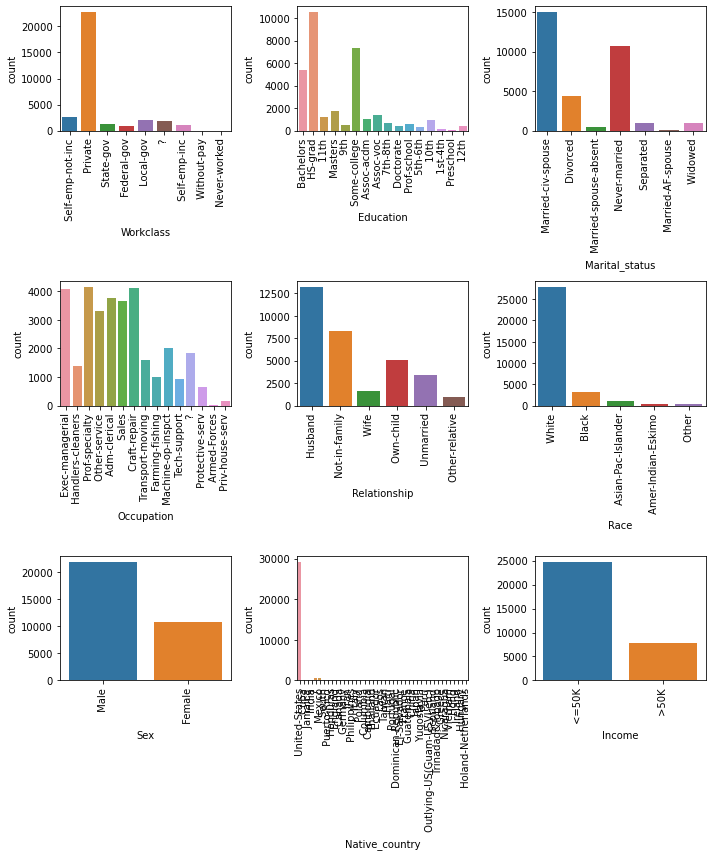

In [12]:
# Now lets see the count of each categorical feature
plt.figure(figsize=(10,12), facecolor ='white')
p_no = 1
for c in cat_ci:
    if p_no <= 9:
        plt.subplot(3,3,p_no)
        print(census_df[c].value_counts())
        plt.xticks(rotation='vertical')
        sns.countplot(x = c, data = census_df)
        plt.xlabel(c, fontsize = 10)
    p_no += 1
plt.tight_layout()    

In [ ]:
- Majority of the people are from US, hence more white people
- Most of them are male, hence you see more husband count
- Many have income less than or equal to 50k
- Many work with private workclass

<AxesSubplot:xlabel='Native_country', ylabel='count'>

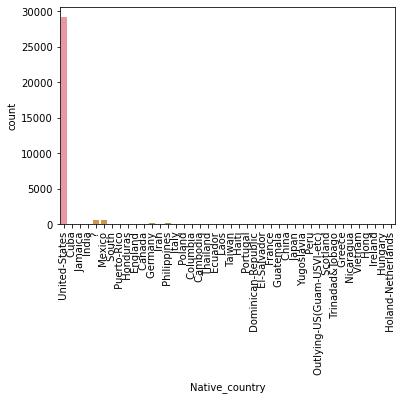

In [13]:
plt.xticks(rotation='vertical')
sns.countplot(x = 'Native_country', data = census_df)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

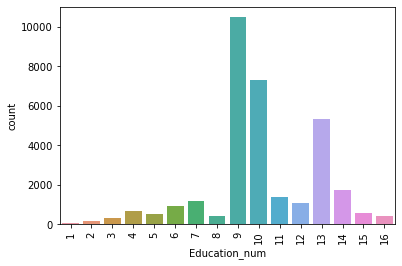

In [14]:
plt.xticks(rotation='vertical')
sns.countplot(x = 'Education_num', data = census_df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

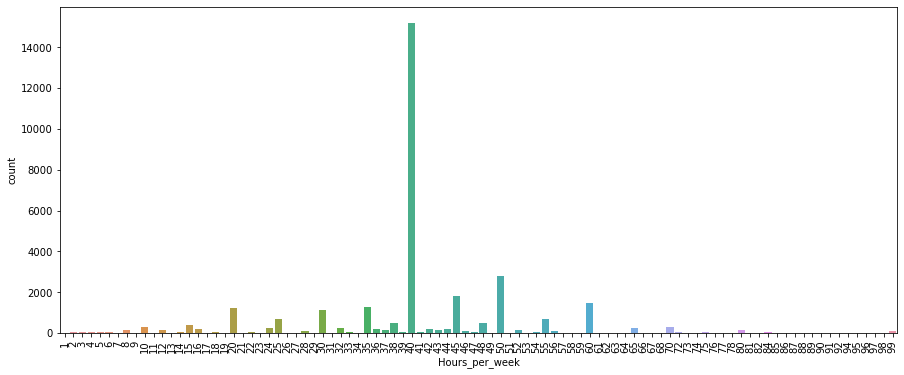

In [15]:
plt.figure(figsize=(15,6), facecolor ='white')
plt.xticks(rotation='vertical')
sns.countplot(x = 'Hours_per_week', data = census_df)

- Most common hours per week is 40hrs

In [16]:
group1 = census_df.groupby('Education')
group1['Age'].agg(np.mean)

Education
 10th            37.429796
 11th            32.355745
 12th            32.000000
 1st-4th         46.142857
 5th-6th         42.885886
 7th-8th         48.445820
 9th             41.060311
 Assoc-acdm      37.381443
 Assoc-voc       38.553546
 Bachelors       38.904931
 Doctorate       47.702179
 HS-grad         38.974479
 Masters         44.049913
 Preschool       42.764706
 Prof-school     44.746528
 Some-college    35.756275
Name: Age, dtype: float64

In [17]:
# Average age of Male and Female
group1 = census_df.groupby('Sex')
group1['Age'].agg(np.mean)

Sex
 Female    36.858230
 Male      39.433567
Name: Age, dtype: float64

In [18]:
# Average age of male and female with less than and greater than 50k
group1 = census_df.groupby(['Income','Sex'])
group1['Age'].agg(np.mean)

Income  Sex    
 <=50K   Female    36.210801
         Male      37.146890
 >50K    Female    42.125530
         Male      44.625788
Name: Age, dtype: float64

In [19]:
# Average age of male and female with less than and greater than 50k based on Occupation
group1 = census_df.groupby(['Income','Occupation', 'Sex'])
group1['Age'].agg(np.mean)

Income  Occupation          Sex    
 <=50K   ?                   Female    36.007605
                             Male      42.078795
         Adm-clerical        Female    36.326022
                             Male      35.143010
         Armed-Forces        Male      28.250000
         Craft-repair        Female    38.212871
                             Male      37.621968
         Exec-managerial     Female    38.617747
                             Male      40.324036
         Farming-fishing     Female    40.650794
                             Male      40.430147
         Handlers-cleaners   Female    34.462500
                             Male      31.035587
         Machine-op-inspct   Female    38.005660
                             Male      36.633388
         Other-service       Female    35.550029
                             Male      33.565649
         Priv-house-serv     Female    42.221429
                             Male      32.375000
         Prof-specialty      Fema

In [20]:
# Average age of male and female with less than and greater than 50k based on Occupation
group1 = census_df.groupby(['Income','Race', 'Sex'])
group1['Age'].agg(np.mean)

Income  Race                 Sex    
 <=50K   Amer-Indian-Eskimo   Female    36.906542
                              Male      36.803571
         Asian-Pac-Islander   Female    34.227723
                              Male      37.289130
         Black                Female    37.624573
                              Male      36.124214
         Other                Female    31.388350
                              Male      33.552448
         White                Female    36.073155
                              Male      37.285005
 >50K    Amer-Indian-Eskimo   Female    39.000000
                              Male      40.041667
         Asian-Pac-Islander   Female    41.162791
                              Male      42.596567
         Black                Female    41.588889
                              Male      44.356902
         Other                Female    36.666667
                              Male      42.947368
         White                Female    42.281128
             

In [21]:
# Average age of male and female with less than and greater than 50k based on Occupation
group1 = census_df.groupby(['Income','Workclass', 'Sex'])
group1['Age'].mean()

Income  Workclass          Sex    
 <=50K   ?                  Female    36.038119
                            Male      42.212121
         Federal-gov        Female    41.463320
                            Male      39.966667
         Local-gov          Female    40.960352
                            Male      40.485535
         Never-worked       Female    24.000000
                            Male      19.200000
         Private            Female    35.069599
                            Male      35.142150
         Self-emp-inc       Female    41.276596
                            Male      43.660000
         Self-emp-not-inc   Female    43.760252
                            Male      44.521333
         State-gov          Female    37.641330
                            Male      36.984704
         Without-pay        Female    58.600000
                            Male      41.777778
 >50K    ?                  Female    44.653846
                            Male      59.719424
     

<AxesSubplot:xlabel='Hours_per_week', ylabel='Fnlwgt'>

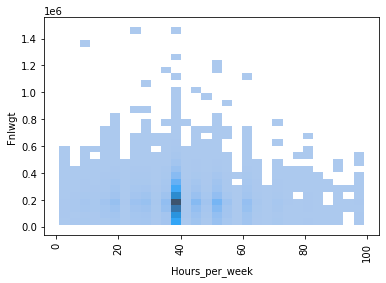

In [22]:
plt.xticks(rotation='vertical')
sns.histplot(y = 'Fnlwgt', x = 'Hours_per_week', data = census_df, bins = 30)

- Most of them work for 40hrs per week

<AxesSubplot:xlabel='Hours_per_week', ylabel='Fnlwgt'>

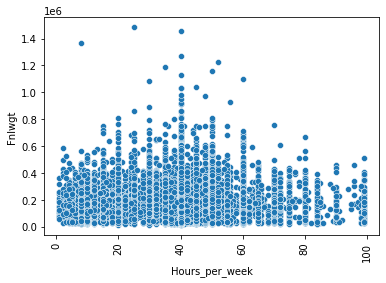

In [23]:
plt.xticks(rotation='vertical')
sns.scatterplot(y = 'Fnlwgt', x = 'Hours_per_week', data = census_df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Fnlwgt'>

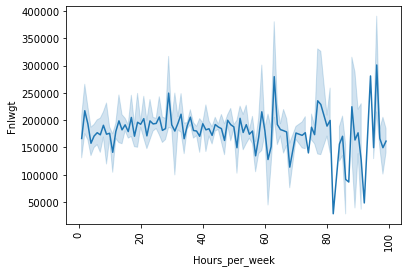

In [24]:
plt.xticks(rotation='vertical')
sns.lineplot(y = 'Fnlwgt', x = 'Hours_per_week', data = census_df)

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

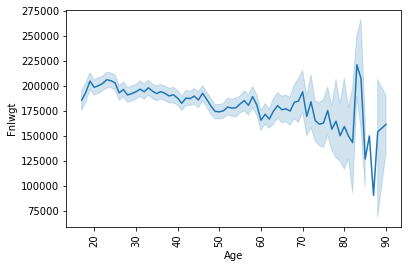

In [25]:
plt.xticks(rotation='vertical')
sns.lineplot(y = 'Fnlwgt', x = 'Age', data = census_df)

---------------Bar plot for Workclass---------------


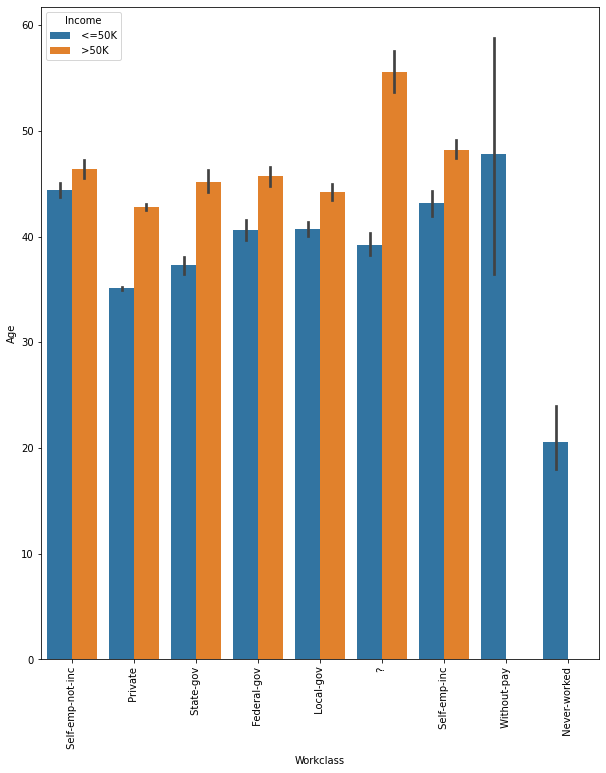

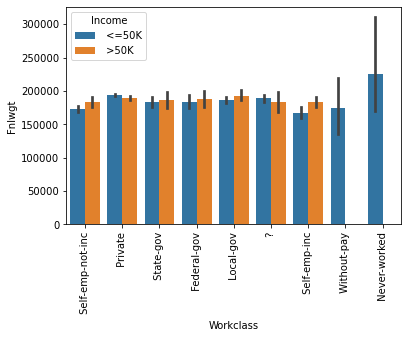

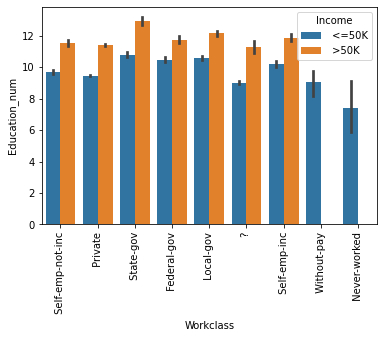

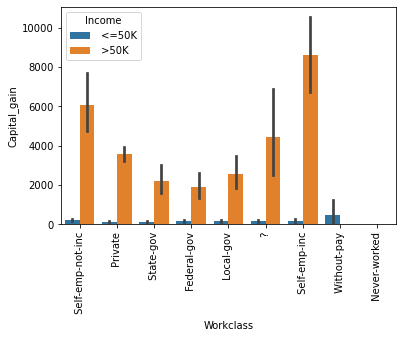

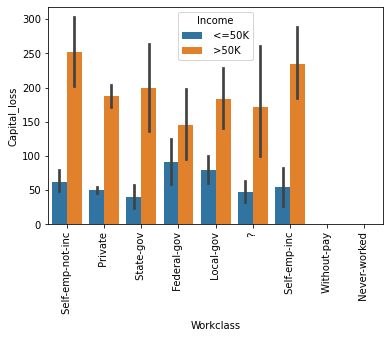

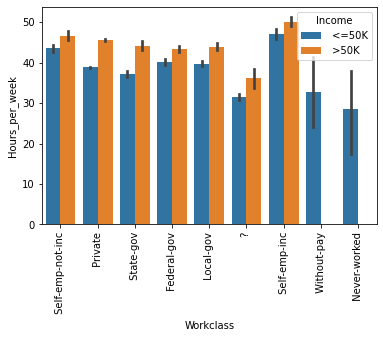

---------------Bar plot for Education---------------


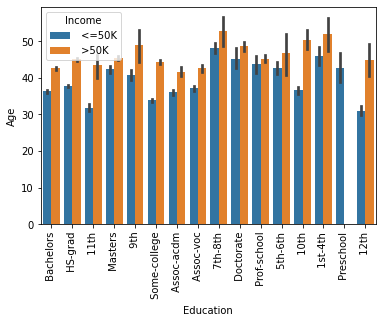

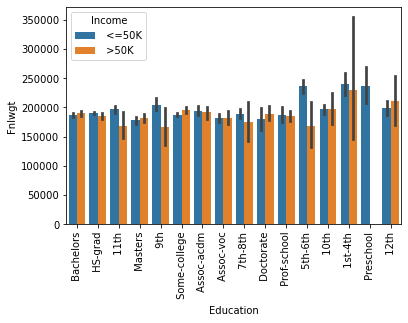

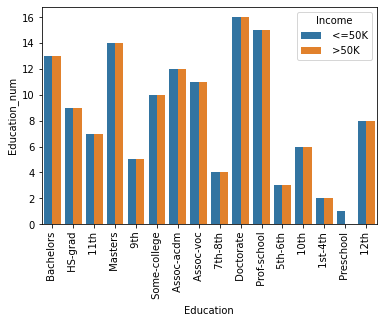

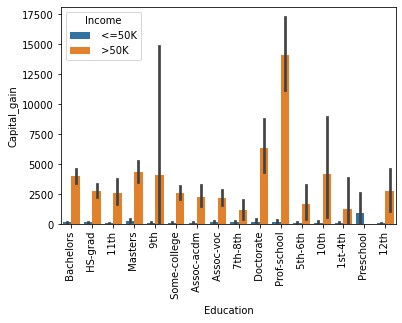

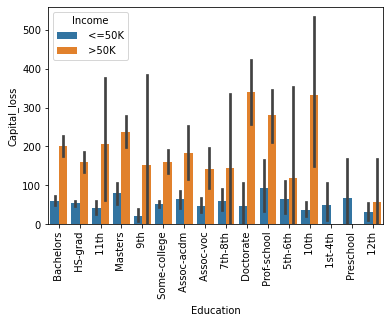

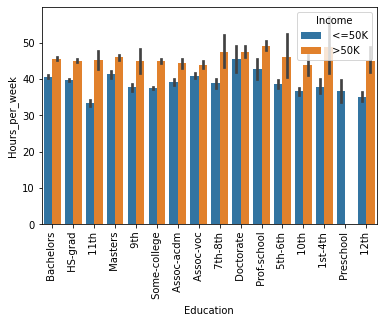

---------------Bar plot for Marital_status---------------


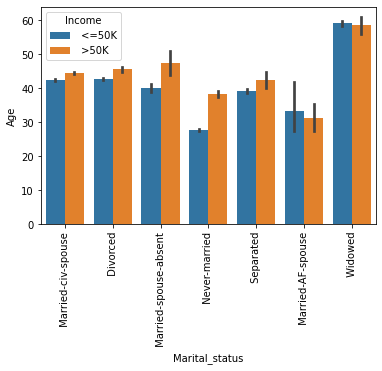

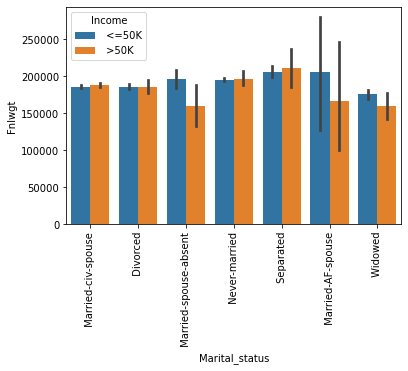

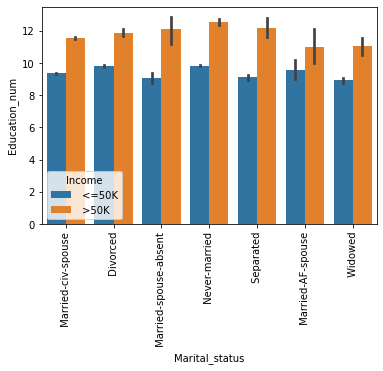

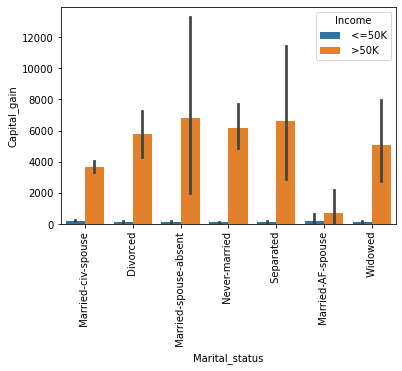

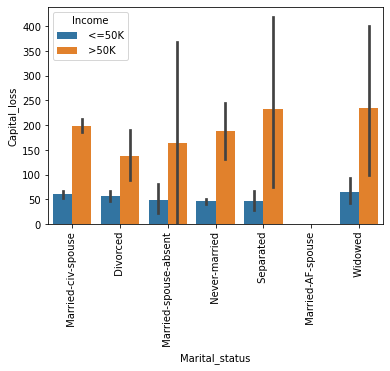

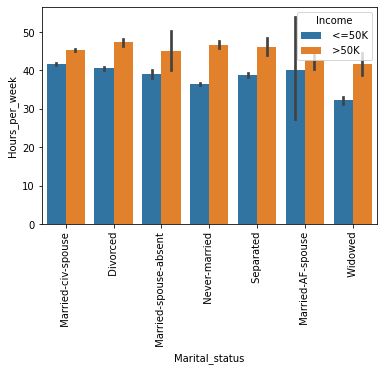

---------------Bar plot for Occupation---------------


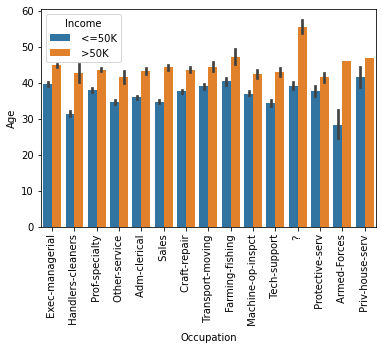

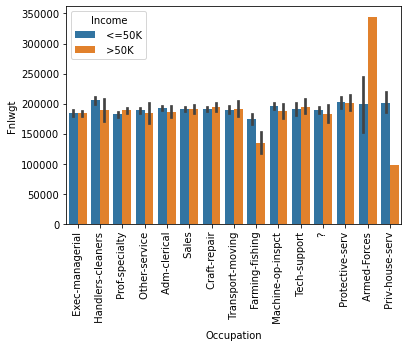

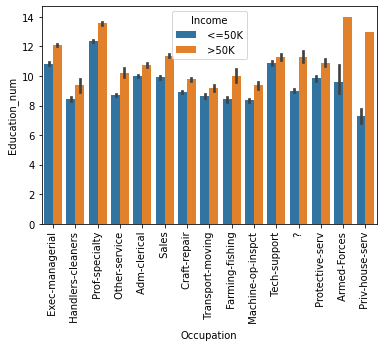

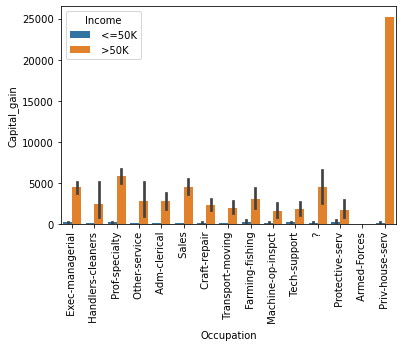

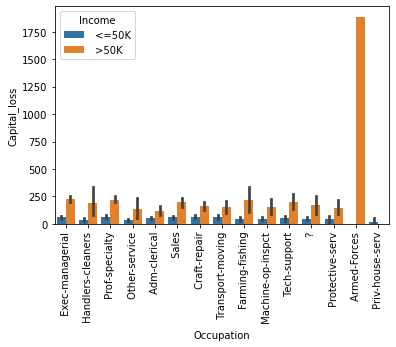

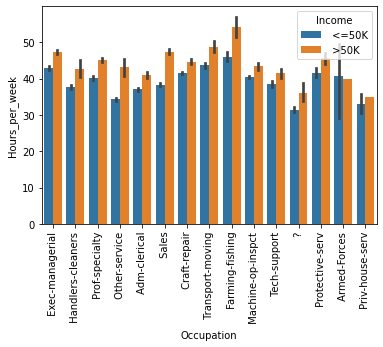

---------------Bar plot for Relationship---------------


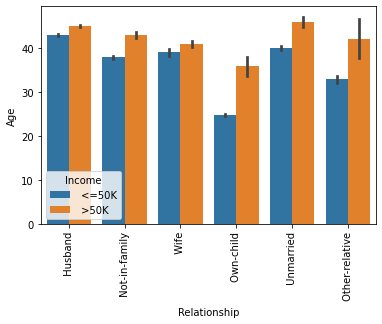

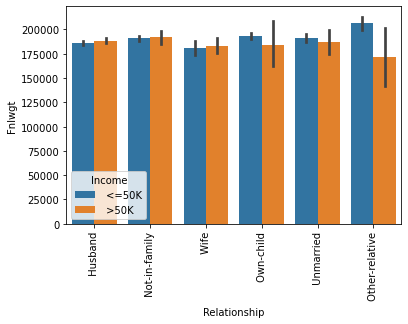

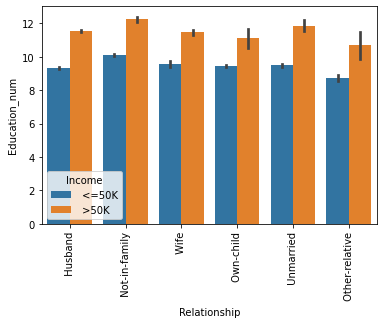

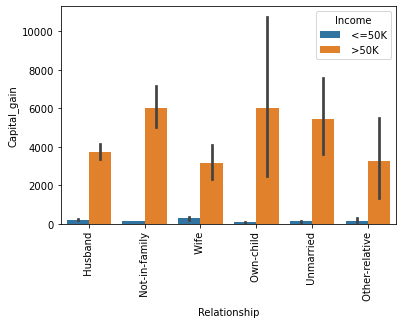

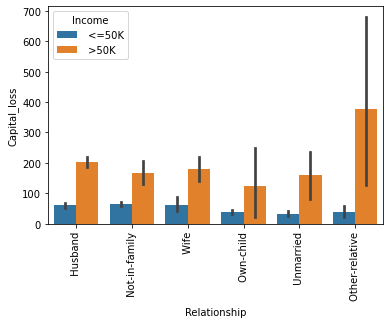

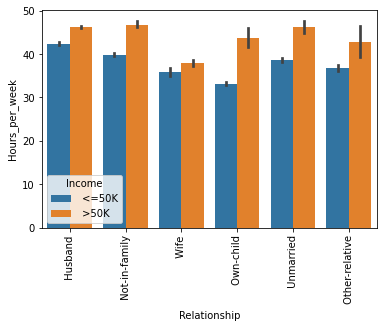

---------------Bar plot for Race---------------


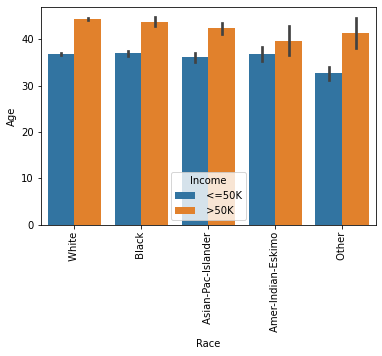

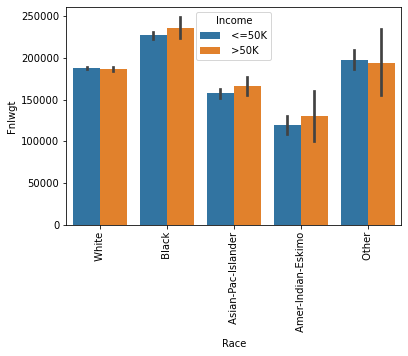

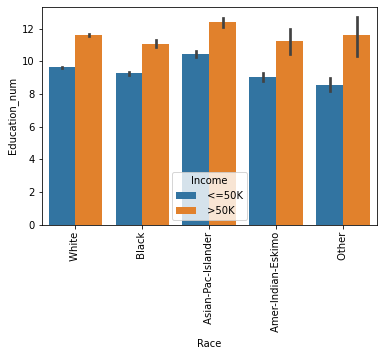

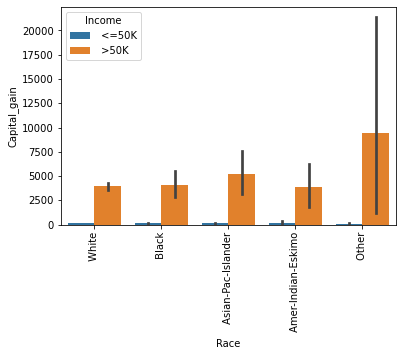

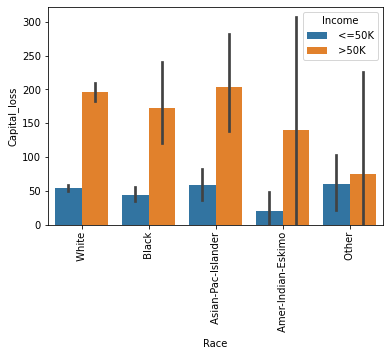

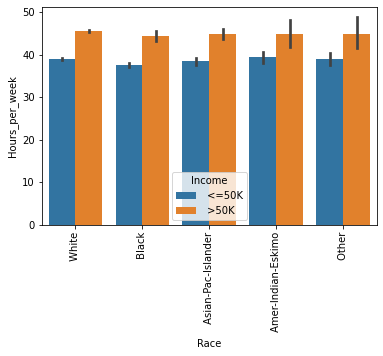

---------------Bar plot for Sex---------------


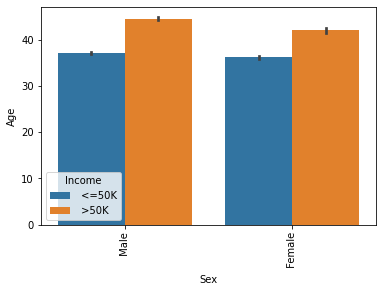

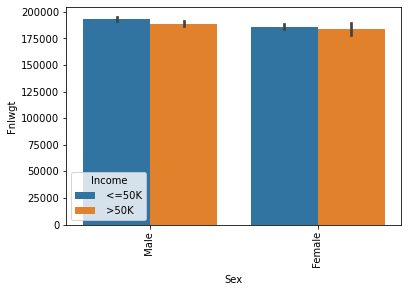

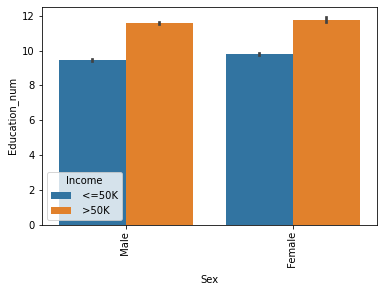

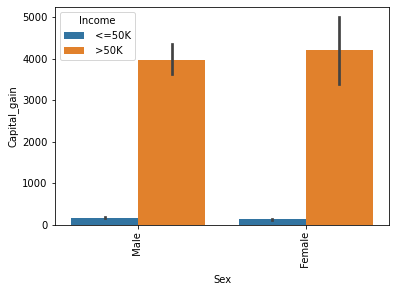

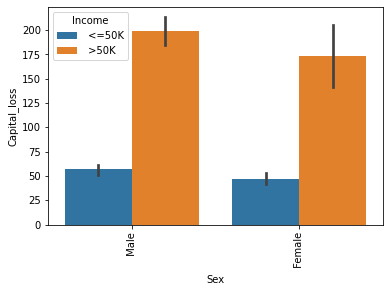

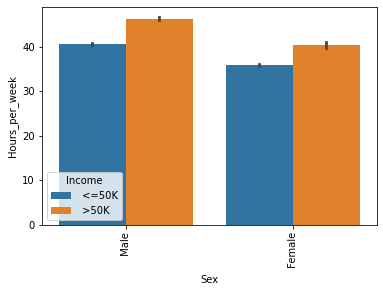

---------------Bar plot for Native_country---------------


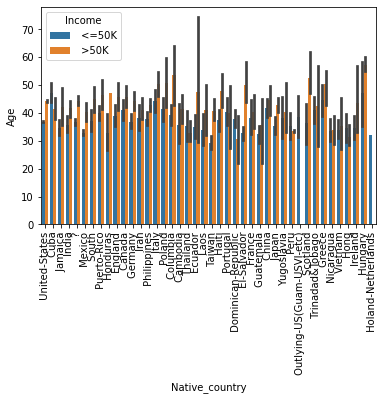

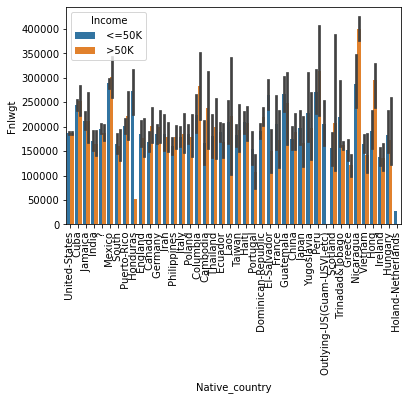

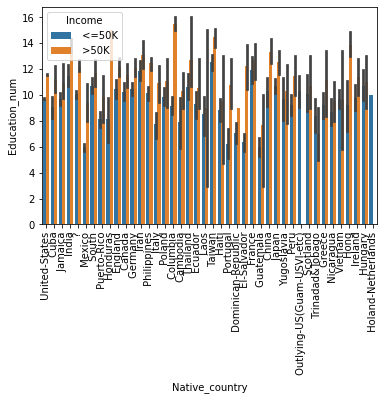

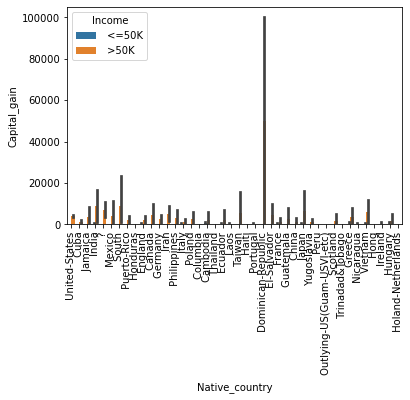

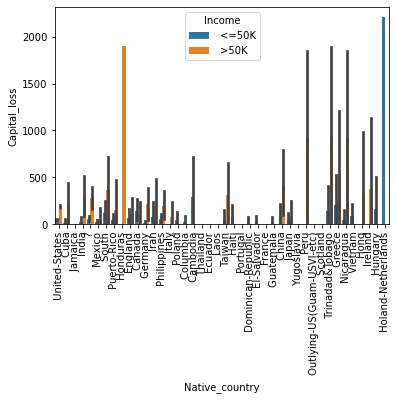

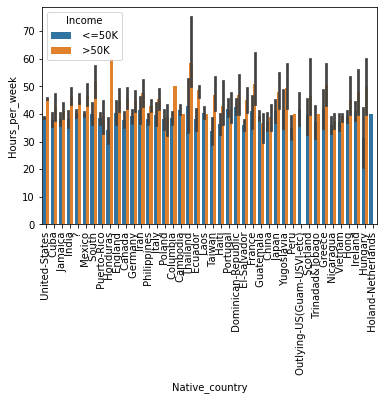

<Figure size 432x288 with 0 Axes>

In [26]:
# Bar Plot for all numerical feature w.r.t categorical variable 
plt.figure(figsize =(10,12))
p_no1 = 1
for cc in cat_ci[:-1]:
    if p_no1 <= len(cat_ci[:-1]):
        print(f'---------------Bar plot for {cc}---------------')
        p_no2 = 1
        for nc in num_ci:
            if p_no2 <= len(num_ci):
                sns.barplot(x = cc ,y = nc, hue = 'Income', data = census_df)
                plt.xticks(rotation = 'vertical')
                plt.show()
            p_no2 += 1
    p_no1 += 1
plt.tight_layout()

- Above bar plots give us the relationship between each categorical variable with numerical variable with respect to income
- In one of the plot the capital gain of both male female is high for income greater than 50k, here too the female have higher than male. Also, same with capital loss
- Capital loss is more with occupation armed forces with income more than 50k
- Capital gain is more with occupation Priv-house-serv with income more than 50k

#### Summary Statistics

In [27]:
census_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


#### Checking for Outliers

Age                  AxesSubplot(0.125,0.657941;0.352273x0.222059)
Fnlwgt            AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Education_num        AxesSubplot(0.125,0.391471;0.352273x0.222059)
Capital_gain      AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Capital_loss            AxesSubplot(0.125,0.125;0.352273x0.222059)
Hours_per_week       AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

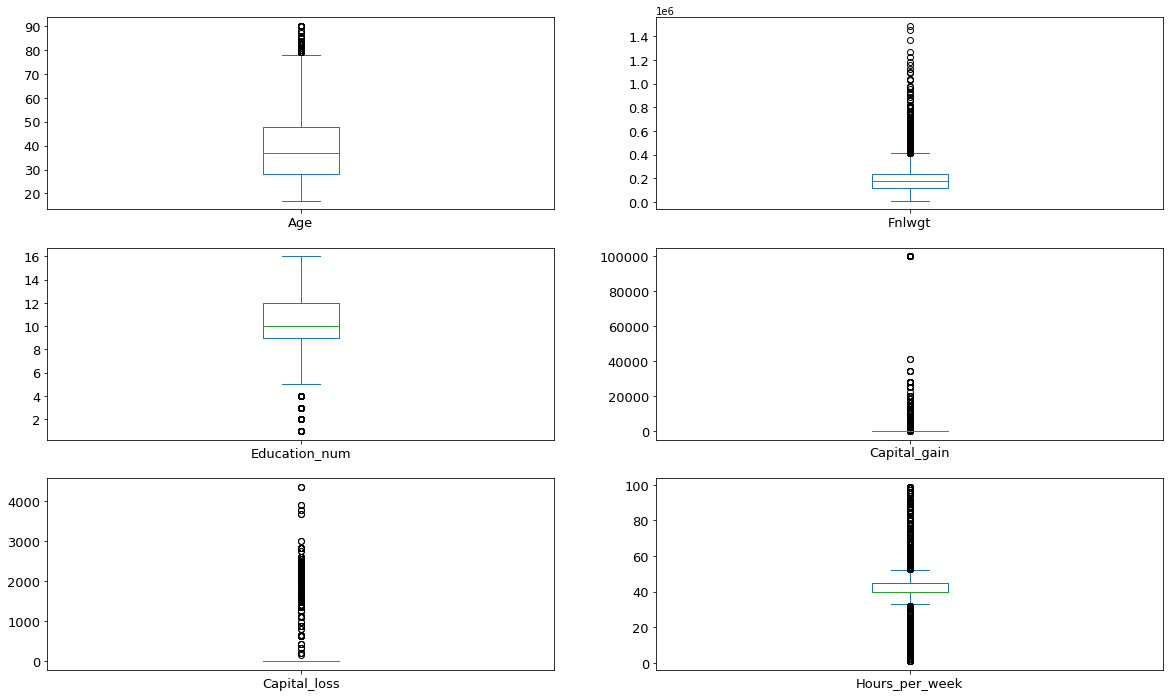

In [28]:
census_df[num_ci].plot(kind='box', subplots = True, layout = (3,2), figsize = (20,12), fontsize = 13)

- Many Outliers

#### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
for c in cat_ci:
    census_df[c]=le.fit_transform(census_df[c])

In [31]:
census_df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
27784,62,4,84756,6,5,2,8,0,4,1,0,0,35,39,0


#### Correlation

In [32]:
census_df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

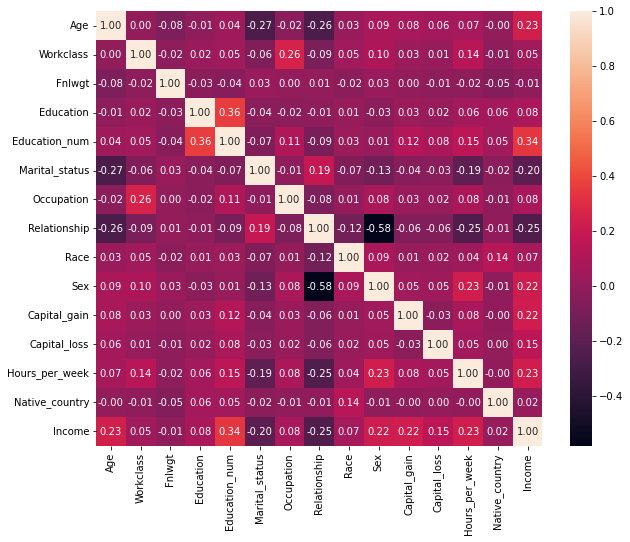

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(census_df.corr(), annot = True, fmt ="0.2f")

#### Outliers

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(census_df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837097,1.463883,1.008742,0.335443,1.134779,0.406183,0.608434,0.900177,0.393675,0.703087,0.145914,0.216663,2.222120,0.291573,0.563210
1,0.042640,0.090121,0.245046,0.181319,0.420027,1.734026,0.135480,0.277810,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
2,1.057031,0.090121,0.425770,2.402489,1.197429,0.406183,0.135480,0.900177,1.962583,0.703087,0.145914,0.216663,0.035430,0.291573,0.563210
3,0.775755,0.090121,1.408146,0.335443,1.134779,0.406183,0.810427,2.211658,1.962583,1.422298,0.145914,0.216663,0.035430,4.054157,0.563210
4,0.115952,0.090121,0.898170,0.439700,1.523480,0.406183,0.608434,2.211658,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.639710,0.852204,0.746077,0.406183,1.519858,2.211658,0.393675,1.422298,0.145914,0.216663,0.197407,0.291573,0.563210
32556,0.103982,0.090121,0.335466,0.181319,0.420027,0.406183,0.100997,0.900177,0.393675,0.703087,0.145914,0.216663,0.035430,0.291573,1.775537
32557,1.423589,0.090121,0.358811,0.181319,0.420027,2.249503,1.317864,1.589291,0.393675,1.422298,0.145914,0.216663,0.035430,0.291573,0.563210
32558,1.215624,0.090121,0.110927,0.181319,0.420027,0.921660,1.317864,0.966924,0.393675,0.703087,0.145914,0.216663,1.655200,0.291573,0.563210


In [35]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [36]:
z.shape

(32560, 15)

In [37]:
# Removing the rows with z score greater than 3
census_df_new = census_df[(z<3).all(axis=1)]
census_df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [38]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", census_df.shape)
print("New DataFrame:-", census_df_new.shape)
print('Total dropped rows:-', census_df.shape[0]-census_df_new.shape[0])

Old DataFrame:- (32560, 15)
New DataFrame:- (27417, 15)
Total dropped rows:- 5143


In [39]:
# Percentage loss of data
loss_percent_census = (32560-27417)/27417*100
print(loss_percent_census,'%')

18.75843454790823 %


#### Checking Skewness

In [40]:
census_df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

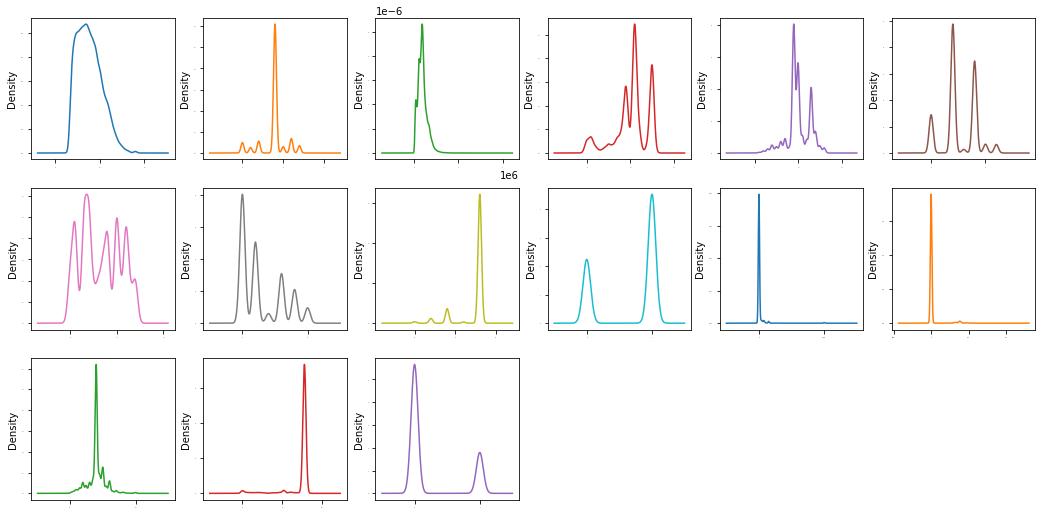

In [41]:
# Let's plot distribution plot
census_df.plot(kind='density', subplots = True, layout = (4,6), sharex = False, legend= False, fontsize =1, figsize = (18,12))
plt.show()

In [42]:
# Splitting the data into x and y
X = census_df.iloc[:,:-1]
X.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
1475,38,4,83727,11,9,0,8,4,4,0,0,0,48,39


In [43]:
y = census_df.iloc[:,-1]
y.sample()

16149    0
Name: Income, dtype: int32

In [44]:
X.shape, y.shape

((32560, 14), (32560,))

In [45]:
# Lets remove the skewness using transformation
for index in X.skew().index:
    if X.skew().loc[index]>0:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<0:
        X[index]=np.square(X[index])

In [46]:
X.skew()

Age               0.064781
Workclass         1.197370
Fnlwgt           -0.671301
Education         0.148429
Education_num     0.567053
Marital_status    1.162771
Occupation       -0.142603
Relationship      0.284979
Race             -2.120488
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week   -1.391917
Native_country   -3.148852
dtype: float64

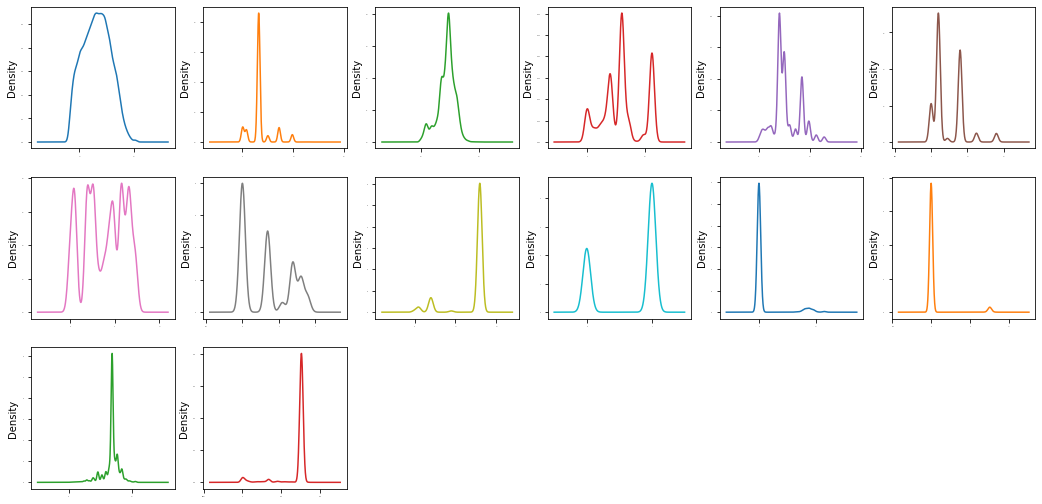

In [47]:
# Let's plot distribution plot
X.plot(kind='density', subplots = True, layout = (4,6), sharex = False, legend= False, fontsize =1, figsize = (18,12))
plt.show()

#### Checking variance inflation factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif_loan=pd.DataFrame()
    vif_loan['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_loan['features names']=X.columns
    print(vif_loan)

In [49]:
vif_calc()

    VIF_Factor  features names
0    26.397193             Age
1     3.885968       Workclass
2    50.077113          Fnlwgt
3     4.203159       Education
4     6.073309   Education_num
5     2.622333  Marital_status
6     3.967961      Occupation
7     3.701204    Relationship
8    10.822634            Race
9     4.772631             Sex
10    1.139342    Capital_gain
11    1.070213    Capital_loss
12   29.349518  Hours_per_week
13   15.871785  Native_country


#### Scaling the data using MinMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms_census = MinMaxScaler()
X = mms_census.fit_transform(X)
X

array([[0.59239938, 0.5625    , 0.35056309, ..., 0.        , 0.3128348 ,
        0.90481856],
       [0.42251143, 0.25      , 0.54879777, ..., 0.        , 0.64216119,
        0.90481856],
       [0.63014791, 0.25      , 0.56723976, ..., 0.        , 0.64216119,
        0.90481856],
       ...,
       [0.68970614, 0.25      , 0.47391422, ..., 0.        , 0.64216119,
        0.90481856],
       [0.12315523, 0.25      , 0.5341159 , ..., 0.        , 0.42401721,
        0.90481856],
       [0.61774331, 0.390625  , 0.61221489, ..., 0.        , 0.64216119,
        0.90481856]])

### Model Building

#### SMOTE for imbalance

In [51]:
# Before proceeding with model building we need to apply SMOTE since the data is imbalanced
from imblearn.over_sampling import SMOTE
smt_loan = SMOTE()
train_x, train_y = smt_loan.fit_resample(X,y)

In [52]:
train_y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [53]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [55]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0
for m in model:
    for i in range(0,20):
        x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.25, random_state=i)
        m.fit(x_train, y_train)
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_train, y_train)
        pred = m.predict(x_test)
        print(f'----------------At random State {i} ------------------')
        acc = accuracy_score(y_test, pred)
        print("Accuracy score of ", m, 'is:', acc)
        print(f'Training score of {m} is {train_score}')
        print(f'Testing score of {m} is {test_score}')
        print('\n')
    
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i
            print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")
            print('\n')
    print('*'*120)

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is: 0.7840614886731392
Training score of LogisticRegression() is 0.782000107880684
Testing score of LogisticRegression() is 0.782000107880684


Maximum accuracy score of LogisticRegression() is 0.7840614886731392 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is: 0.7822006472491909
Training score of LogisticRegression() is 0.7824046604455472
Testing score of LogisticRegression() is 0.7824046604455472


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is: 0.7888349514563107
Training score of LogisticRegression() is 0.7804358379632127
Testing score of LogisticRegression() is 0.7804358379632127


Maximum accuracy score of LogisticRegression() is 0.7888349514563107 at Random state 2


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is: 0.78535598

###### Maximum accuracy score of RandomForestClassifier() is 0.9022653721682848 at Random state 2

#### Cross validation of all the Algorithms

In [56]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for m in model:
    print(f'---------------------- Cross Validation of {m} --------------------------')
    for j in range(2,6):
        cv_score = cross_val_score(m, train_x,train_y,cv=j)
        cv_mean = cv_score.mean()
        print(f"At cross fold {j} the cv score is {cv_mean}")
        print('\n') 
    
        if cv_mean > max_cvscore:
            max_cvscore=cv_mean
            max_cv = j
            print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")
            print('\n') 
    print('*'*120)
    print('\n')

---------------------- Cross Validation of LogisticRegression() --------------------------
At cross fold 2 the cv score is 0.7822929730167079


At cross fold 2 the Maximum CV score is 0.7822929730167079


At cross fold 3 the cv score is 0.782131229685089


At cross fold 4 the cv score is 0.782070553578999


At cross fold 5 the cv score is 0.7823537056931023


At cross fold 5 the Maximum CV score is 0.7823537056931023


************************************************************************************************************************


---------------------- Cross Validation of GaussianNB() --------------------------
At cross fold 2 the cv score is 0.7745256685140984


At cross fold 3 the cv score is 0.7751123438755337


At cross fold 4 the cv score is 0.7746470838305274


At cross fold 5 the cv score is 0.7750516986772537


************************************************************************************************************************


---------------------- Cross Validat

In [57]:
print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")

At cross fold 5 the Maximum CV score is 0.8988643864176522


- cross fold 5 the Maximum CV score is 0.8988643864176522 for Random Forest

#### Training each algorithm for Random state 2

In [58]:
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.25, random_state=2)
    m.fit(x_train, y_train)
    train_score = m.score(x_train, y_train)
    test_score = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print(f'--------------------- {m} ----------------------')
    acc_hr = accuracy_score(y_test, pred)
    print("Accuracy score of ", m, 'is:', acc)
    print(f'Training score of {m} is {train_score}')
    print(f'Testing score of {m} is {test_score}')
    print("Confusion Matrix:\n",confusion_matrix(y_test, pred))
    print('Classification Report:\n',classification_report(y_test, pred))
    print('*'*120,'\n')

--------------------- LogisticRegression() ----------------------
Accuracy score of  LogisticRegression() is: 0.9004854368932039
Training score of LogisticRegression() is 0.7804358379632127
Testing score of LogisticRegression() is 0.7804358379632127
Confusion Matrix:
 [[4757 1367]
 [1243 4993]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      6124
           1       0.79      0.80      0.79      6236

    accuracy                           0.79     12360
   macro avg       0.79      0.79      0.79     12360
weighted avg       0.79      0.79      0.79     12360

************************************************************************************************************************ 

--------------------- GaussianNB() ----------------------
Accuracy score of  GaussianNB() is: 0.9004854368932039
Training score of GaussianNB() is 0.7742866389772911
Testing score of GaussianNB() is 0.7742866389772911
Confusion Ma

- Random Forest Classifier is giving good results

#### Hyper Parameter Tunning

In [59]:
from sklearn.model_selection import GridSearchCV

##### Tunning with Logistic Regression

In [61]:
param_lg = { 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class': ['auto', 'ovr', 'multinomial'],
             'penalty': ['l1', 'l2', 'elasticnet'],
              'C':[100, 10, 1.0, 0.1, 0.01]}

gcv_lg = GridSearchCV(lg,param_lg,cv=5,scoring= 'accuracy')

# training
gcv_lg.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_lg.best_params_)

print("Best Estimator:",gcv_lg.best_estimator_)

gcv_lg_pred=gcv_lg.best_estimator_.predict(x_test)

print('Final Accuracy with Logistic Regression:', accuracy_score(y_test,gcv_lg_pred))

Best parameters: {'C': 0.01, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.01, solver='newton-cg')
Final Accuracy with Logistic Regression: 0.7877831715210356


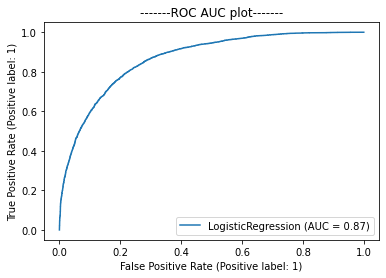

In [62]:
##### ROC ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_lg.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with GaussianNB

In [63]:
param_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

gcv_gnb = GridSearchCV(gnb,param_gnb,cv=5,scoring= 'accuracy')

# training
gcv_gnb.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_gnb.best_params_)

print("Best Estimator:",gcv_gnb.best_estimator_)

gcv_gnb_pred=gcv_gnb.best_estimator_.predict(x_test)

print('Final Accuracy with Gaussian Naive Bayes:', accuracy_score(y_test,gcv_gnb_pred))

Best parameters: {'var_smoothing': 0.005336699231206307}
Best Estimator: GaussianNB(var_smoothing=0.005336699231206307)
Final Accuracy with Gaussian Naive Bayes: 0.7784789644012945


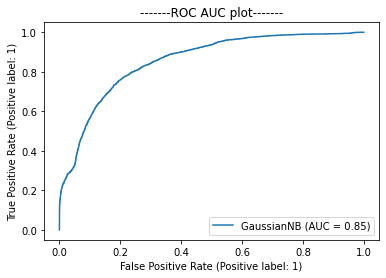

In [64]:
# ROC ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_gnb.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with support vector classifier

In [65]:
param_svc = {"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}

gcv_svc = GridSearchCV(svc,param_svc,cv=5,scoring= 'accuracy')

# training
gcv_svc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_svc.best_params_)

print("Best Estimator:",gcv_svc.best_estimator_)

gcv_svc_pred=gcv_svc.best_estimator_.predict(x_test)

print('Final Accuracy with Support Vector Classifier:', accuracy_score(y_test,gcv_svc_pred))

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best Estimator: SVC(C=10)
Final Accuracy with Support Vector Classifier: 0.8378640776699029


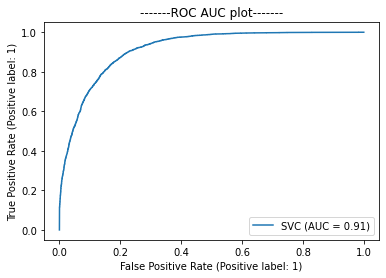

In [66]:
# ROC curve
plot_roc_curve(gcv_svc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with Decision Tree Classifier

In [67]:
param_dtc = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}

gcv_dtc = GridSearchCV(dtc,param_dtc,cv=5,scoring= 'accuracy')

# training
gcv_dtc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_dtc.best_params_)

print("Best Estimator:",gcv_dtc.best_estimator_)

gcv_dtc_pred=gcv_dtc.best_estimator_.predict(x_test)

print('Final Accuracy with Decision Tree Classifier:', accuracy_score(y_test,gcv_dtc_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20)
Final Accuracy with Decision Tree Classifier: 0.8547734627831716


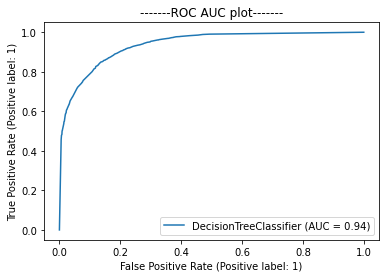

In [68]:
# ROC curve
plot_roc_curve(gcv_dtc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with K Neighbor classifier

In [69]:
param_knn = {'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']}

gcv_knn = GridSearchCV(knn,param_knn,cv=5,scoring= 'accuracy')

# training
gcv_knn.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_knn.best_params_)

print("Best Estimator:",gcv_knn.best_estimator_)

gcv_knn_pred=gcv_knn.best_estimator_.predict(x_test)

print('Final Accuracy with K Neighbor Classifier:', accuracy_score(y_test,gcv_knn_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(metric='manhattan', weights='distance')
Final Accuracy with K Neighbor Classifier: 0.8748381877022654


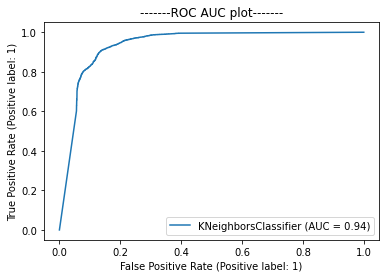

In [70]:
# ROC ROC curve
plot_roc_curve(gcv_knn.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning With Random Forest Classifier

In [71]:
param_rfc = {'n_estimators': [100,200],'max_features': ['auto', 'sqrt'],
             'max_depth': [10, 20],
             'min_samples_split': [6, 10],'min_samples_leaf': [1, 3]}

gcv_rfc = GridSearchCV(rfc,param_rfc,cv=5,scoring= 'accuracy')

# training
gcv_rfc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_rfc.best_params_)

print("Best Estimator:",gcv_rfc.best_estimator_)

gcv_rfc_pred=gcv_rfc.best_estimator_.predict(x_test)

print('Final Accuracy with Random Forest Classifier:', accuracy_score(y_test,gcv_rfc_pred))

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=6,
                       n_estimators=200)
Final Accuracy with Random Forest Classifier: 0.8923139158576052


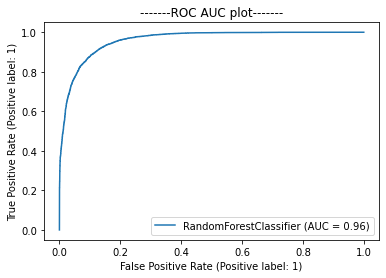

In [72]:
# ROC ROC curve
plot_roc_curve(gcv_rfc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

### Pickling

In [73]:
# Pickling of the file or serialization of a file
# Random Forest Classifier
import joblib
joblib.dump(gcv_rfc.best_estimator_,"Census_income.pkl")

['Census_income.pkl']

In [74]:
census_model = joblib.load('Census_income.pkl')
census_result = census_model.score(x_test, y_test)
print(census_result*100)

89.23139158576052


#### Conclusion

In [75]:
census_conclusion = pd.DataFrame([census_model.predict(x_test),y_test], index=['Predicted Loan Status', 'Original Loan Status'])
census_conclusion.T

,Predicted Loan Status,Original Loan Status
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
12355,1,1
12356,0,0
12357,0,0
12358,0,0


In [76]:
census_conclusion.T[['Predicted Loan Status', 'Original Loan Status']].value_counts()

Predicted Loan Status  Original Loan Status
1                      1                       5735
0                      0                       5294
1                      0                        830
0                      1                        501
dtype: int64

###### We can see that model is predicting well 
###### Out of 12360 test data model is predicting accurately on 5735+5294 = 11029 occasions and wrong on 830+501 = 1331 occasions